In [18]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import numpy as np
import random
import time

In [4]:
def make_graph_nx(node_list, target_nodes, edge_list):
    G = nx.Graph()
    labels = {}
    for node in node_list:
        labels[node] = node
        G.add_node(node)

    G.add_node(target_nodes[0])
    labels[target_nodes[0]] = target_nodes[0]
    G.add_node(target_nodes[1])
    labels[target_nodes[1]] = target_nodes[1]

    for edge in edge_list:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    pos = nx.kamada_kawai_layout(G)

    return G, pos, labels


def draw_graph(graph, pos, nodes, targets, labels):
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='g', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=targets, node_color='r', node_size=500)
    nx.draw_networkx_edges(G, pos, width=1.0)
    nx.draw_networkx_labels(G, pos, labels, font_size=16)


def draw_shortest_path_graph(graph, pos, nodes, targets, labels, path_nodes):
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='g', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=targets, node_color='r', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color='y', node_size=500)
    nx.draw_networkx_edges(G, pos, width=1.0)
    nx.draw_networkx_labels(G, pos, labels, font_size=16)


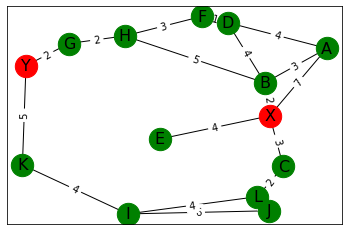

In [5]:
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
targets = ['X', 'Y']
edges = [
    ('X', 'A', 7),
    ('X', 'B', 2),
    ('X', 'C', 3),
    ('X', 'E', 4),
    ('A', 'B', 3),
    ('A', 'D', 4),
    ('B', 'D', 4),
    ('B', 'H', 5),
    ('C', 'L', 2),
    ('D', 'F', 1),
    ('F', 'H', 3),
    ('G', 'H', 2),
    ('G', 'Y', 2),
    ('I', 'J', 6),
    ('I', 'K', 4),
    ('I', 'L', 4),
    ('J', 'L', 1),
    ('K', 'Y', 5),
]

G, pos, labels = make_graph_nx(nodes, targets, edges)
draw_graph(G, pos, nodes, targets, labels)

In [6]:
pred_dijkstra, dist_dijkstra = nx.dijkstra_predecessor_and_distance(G, 'X')

data_dijkstra = []
for key, val in sorted(dist_dijkstra.items()):
    data_dijkstra.append(['X', key, val, pred_dijkstra[key]])

df_dijkstra = pd.DataFrame(data_dijkstra, columns = ['Source', 'Target', 'Shortest Distance', 'Predecessor'])
df_dijkstra

,Source,Target,Shortest Distance,Predecessor
0,X,A,5,[B]
1,X,B,2,[X]
2,X,C,3,[X]
3,X,D,6,[B]
4,X,E,4,[X]
5,X,F,7,[D]
6,X,G,9,[H]
7,X,H,7,[B]
8,X,I,9,[L]
9,X,J,6,[L]


In [7]:
shortest_path_dijkstra = nx.dijkstra_path(G, 'X', 'Y', weight='weight')
path_nodes_dijkstra = shortest_path_dijkstra[1:len(shortest_path_dijkstra)-1]
print(shortest_path_dijkstra)

['X', 'B', 'H', 'G', 'Y']


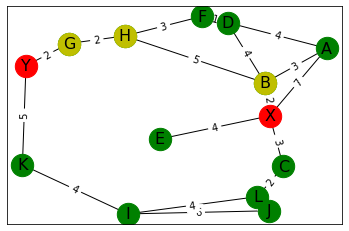

In [8]:
draw_shortest_path_graph(G, pos, nodes, targets, labels, path_nodes_dijkstra)

In [9]:
pred_bf, dist_bf = nx.bellman_ford_predecessor_and_distance(G, 'X')

data_bf = []
for key, val in sorted(dist_bf.items()):
    data_bf.append(['X', key, val, pred_bf[key]])

df_bf = pd.DataFrame(data_bf, columns = ['Source', 'Target', 'Shortest Distance', 'Predecessor'])
df_bf

,Source,Target,Shortest Distance,Predecessor
0,X,A,5,[B]
1,X,B,2,[X]
2,X,C,3,[X]
3,X,D,6,[B]
4,X,E,4,[X]
5,X,F,7,[D]
6,X,G,9,[H]
7,X,H,7,[B]
8,X,I,9,[L]
9,X,J,6,[L]


In [10]:
shortest_path_bf = nx.bellman_ford_path(G, 'X', 'Y', weight='weight')
path_nodes_bf = shortest_path_bf[1:len(shortest_path_bf)-1]
print(shortest_path_bf)
print(path_nodes_bf)

['X', 'B', 'H', 'G', 'Y']
['B', 'H', 'G']


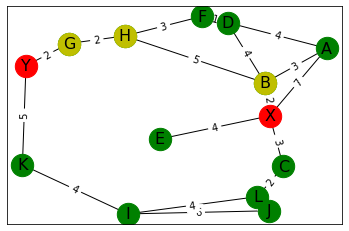

In [11]:
draw_shortest_path_graph(G, pos, nodes, targets, labels, path_nodes_bf)

In [12]:
small_graphs = []

for i in range(1000):
    g = nx.gnm_random_graph(20,40)
    for (u, v) in g.edges():
        g.edges[u,v]['weight'] = random.randint(0,10)
    small_graphs.append(g)

In [13]:
def calc_dijkstra(g):
    start = time.time()
    pred, dist = nx.dijkstra_predecessor_and_distance(g, 0)
    end = time.time()
    time_n = end - start
    return time_n

def calc_bellman_ford(g):
    start = time.time()
    pred, dist = nx.bellman_ford_predecessor_and_distance(g, 0)
    end = time.time()
    time_n = end - start
    return time_n

def calc_floyd_warshall(g):
    start = time.time()
    pred, dist = nx.floyd_warshall_predecessor_and_distance(g, 0)
    end = time.time()
    time_n = end - start
    return time_n

small_data = []
for graph in small_graphs:
    time_d = calc_dijkstra(graph)
    time_bf = calc_bellman_ford(graph)
    time_fw = calc_floyd_warshall(graph)
    small_data.append([time_d, time_bf, time_fw])
    
small_time_df = pd.DataFrame(small_data, columns=['Dijkstra', 'Bellman-Ford', 'Floyd-Warshall'])

In [14]:
neg_weights_graphs = []

for i in range(1000):
    g = nx.gnm_random_graph(20,40)
    for (u, v) in g.edges():
        g.edges[u,v]['weight'] = random.randint(-10,10)
    neg_weights_graphs.append(g)

neg_weights_data = []
for graph in neg_weights_graphs:
    time_fw = calc_floyd_warshall(graph)
    neg_weights_data.append(time_fw)

small_time_df['Floyd-Warshall (Negative)'] = neg_weights_data
small_time_df

,Dijkstra,Bellman-Ford,Floyd-Warshall,Floyd-Warshall (Negative)
0,0.000155,0.000414,0.012312,0.001745
1,0.000247,0.000290,0.006770,0.001521
2,0.000232,0.000597,0.003786,0.001476
3,0.000256,0.001839,0.003061,0.001479
4,0.000108,0.000299,0.001608,0.004567
...,...,...,...,...
995,0.000096,0.000304,0.001749,0.001490
996,0.000095,0.000306,0.001665,0.001988
997,0.000088,0.000209,0.001701,0.002090
998,0.000092,0.000244,0.001511,0.003279


In [15]:
large_graphs = []

for i in range(1000):
    g = nx.gnm_random_graph(100,200)
    for (u, v) in g.edges():
        g.edges[u,v]['weight'] = random.randint(0,10)
    large_graphs.append(g)

large_data = []
for graph in large_graphs:
    time_d = calc_dijkstra(graph)
    time_bf = calc_bellman_ford(graph)
    time_fw = calc_floyd_warshall(graph)
    large_data.append([time_d, time_bf, time_fw])

large_time_df = pd.DataFrame(large_data, columns=['Dijkstra', 'Bellman-Ford', 'Floyd-Warshall'])
large_time_df

,Dijkstra,Bellman-Ford,Floyd-Warshall
0,0.000411,0.001350,0.141101
1,0.000396,0.000806,0.134200
2,0.000354,0.001170,0.148018
3,0.000424,0.001516,0.164083
4,0.000403,0.001038,0.134088
...,...,...,...
995,0.000309,0.000744,0.132489
996,0.000329,0.000754,0.126795
997,0.000340,0.000876,0.127025
998,0.000584,0.001038,0.128312


In [17]:
small_graphs_avg_time = [
    small_time_df['Dijkstra'].sum()/len(small_time_df['Dijkstra']),
    small_time_df['Bellman-Ford'].sum()/len(small_time_df['Bellman-Ford']),
    small_time_df['Floyd-Warshall'].sum()/len(small_time_df['Floyd-Warshall']),
    small_time_df['Floyd-Warshall (Negative)'].sum()/len(small_time_df['Floyd-Warshall (Negative)'])
]

large_graphs_avg_time = [
    large_time_df['Dijkstra'].sum()/len(large_time_df['Dijkstra']),
    large_time_df['Bellman-Ford'].sum()/len(large_time_df['Bellman-Ford']),
    large_time_df['Floyd-Warshall'].sum()/len(large_time_df['Floyd-Warshall'])
]

print(small_graphs_avg_time)
print(large_graphs_avg_time)

[0.00010242509841918945, 0.00026700520515441896, 0.0017939596176147462, 0.0023189413547515868]
[0.00040994119644165037, 0.0011422510147094727, 0.15048858499526976]


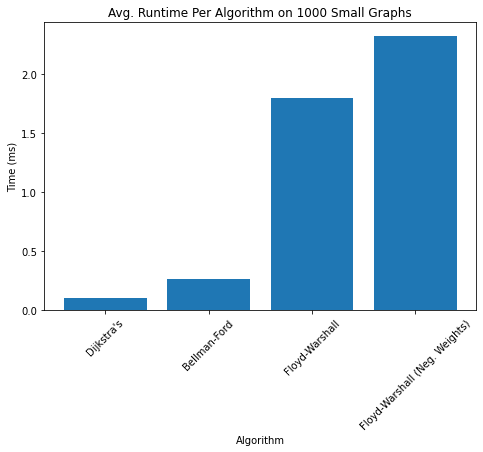

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algorithm = ['Dijkstra\'s', 'Bellman-Ford', 'Floyd-Warshall', 'Floyd-Warshall (Neg. Weights)']
time = np.asarray(small_graphs_avg_time) * 1000
ax.bar(algorithm, time)
plt.title('Avg. Runtime Per Algorithm on 1000 Small Graphs')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.ylabel('Time (ms)')
plt.show()

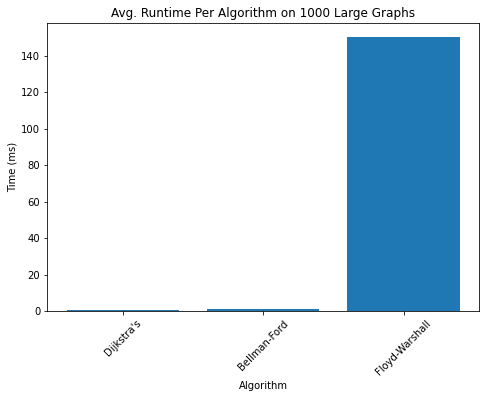

In [31]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
algorithm2 = ['Dijkstra\'s', 'Bellman-Ford', 'Floyd-Warshall']
time2 = np.asarray(large_graphs_avg_time) * 1000
ax2.bar(algorithm2, time2)
plt.title('Avg. Runtime Per Algorithm on 1000 Large Graphs')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.ylabel('Time (ms)')
plt.show()

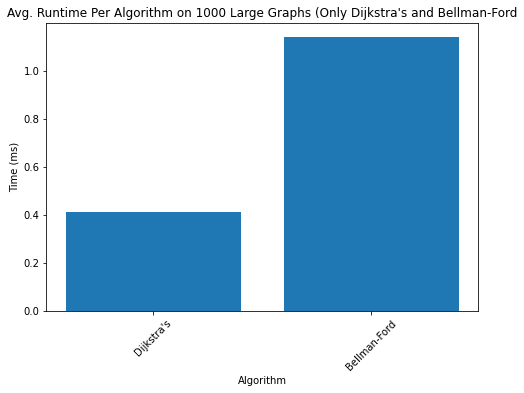

In [32]:
fig3 = plt.figure()
ax3 = fig3.add_axes([0,0,1,1])
algorithm3 = ['Dijkstra\'s', 'Bellman-Ford']
time3 = np.asarray(large_graphs_avg_time[:len(large_graphs_avg_time)-1]) * 1000
ax3.bar(algorithm3, time3)
plt.title('Avg. Runtime Per Algorithm on 1000 Large Graphs (Only Dijkstra\'s and Bellman-Ford')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.ylabel('Time (ms)')
plt.show()